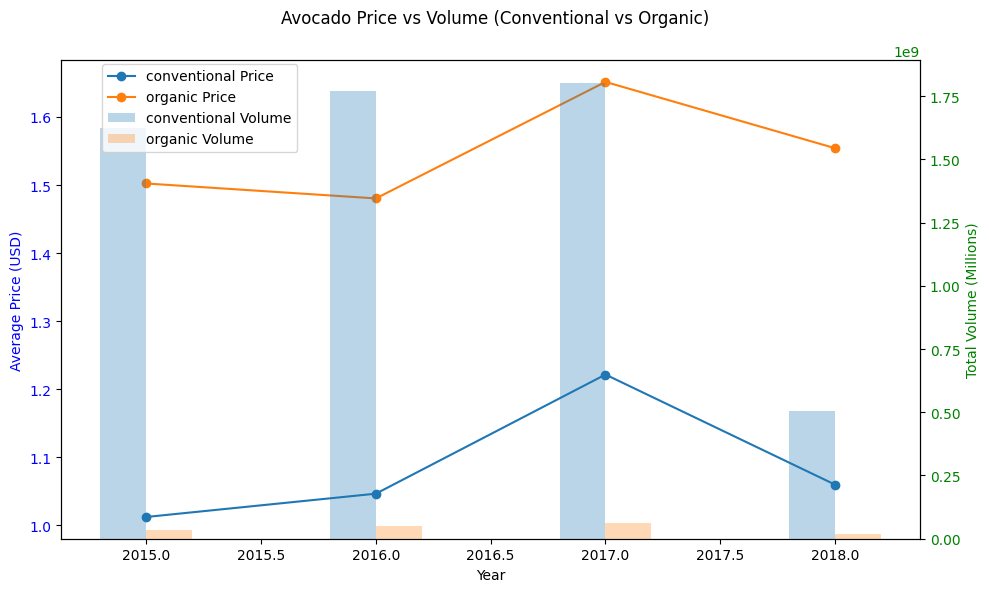

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('avocado.csv')

# Step 2: Basic preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna()

# Step 3: Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Step 4: Filter for a specific region (e.g., 'TotalUS')
us_df = df[df['region'] == 'TotalUS']

# Step 5: Group by year and type
grouped = us_df.groupby(['Year', 'type']).agg({
    'AveragePrice': 'mean',
    'Total Volume': 'sum'
}).reset_index()

# Step 6: Plotting - Dual axis plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Line for Average Price
for avocado_type in ['conventional', 'organic']:
    type_df = grouped[grouped['type'] == avocado_type]
    ax1.plot(type_df['Year'], type_df['AveragePrice'], label=f'{avocado_type} Price', marker='o')

ax1.set_xlabel('Year')
ax1.set_ylabel('Average Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis
ax2 = ax1.twinx()

# Bar for Total Volume
for avocado_type in ['conventional', 'organic']:
    type_df = grouped[grouped['type'] == avocado_type]
    ax2.bar(type_df['Year'] + (0.1 if avocado_type == 'organic' else -0.1),
            type_df['Total Volume'],
            width=0.2,
            alpha=0.3,
            label=f'{avocado_type} Volume')

ax2.set_ylabel('Total Volume (Millions)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Legends and Title
fig.suptitle('Avocado Price vs Volume (Conventional vs Organic)')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

# Step 7: Exporting Summary
summary = grouped.pivot(index='Year', columns='type', values='AveragePrice')
summary.to_csv('avocado_summary.csv')